In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("spearman_corr.csv")
df_month

,May_6,November_7,April_8,August_3,December_2,November_3,August_4,October,April_10,July,...,February_2,February_6,May_3,March,November_4,April_2,July_3,November_2,November_5,April_5
0,0.426002,-0.414703,0.133591,0.577440,-0.233301,0.827789,0.400172,-0.338700,-0.050333,-0.425964,...,-0.815740,-0.116549,0.044907,0.100928,-0.219897,0.874274,0.290080,0.874171,-0.360138,0.581296
1,0.343893,-0.414703,0.146146,0.577440,-0.233301,0.827789,0.400172,-0.338700,-0.203332,-0.425964,...,0.221720,-0.090999,-0.158698,-0.419456,-0.219897,0.353397,0.290080,0.874171,-0.360138,0.509800
2,0.197382,0.119779,0.100033,0.806378,-0.675635,0.192062,0.329216,0.326479,-0.147272,-0.163479,...,-0.750989,-0.241412,-0.042881,0.000503,-0.316864,-0.016249,0.094743,1.159349,-0.147265,0.570283
3,-0.069665,-0.082401,0.006054,0.512310,-0.410518,0.484618,0.386858,-0.092277,-0.409264,-0.314234,...,-0.602457,-0.126016,-0.432506,-0.806541,-0.600256,-0.158023,0.614952,1.073638,-0.291265,0.622885
4,-0.835852,-1.015143,-0.124219,0.211962,-0.230980,0.434227,0.479675,0.080417,-0.523008,-0.573076,...,-0.461716,0.300532,-0.288265,-0.653793,-0.273813,-0.072941,-0.008511,0.657452,-0.161633,0.407397
5,-0.070522,-0.818627,0.016689,-0.290574,-0.454416,-0.226640,0.593927,0.084982,-0.524921,-0.615504,...,-0.728250,-0.183712,0.082180,-0.312365,-0.552917,0.173635,0.273664,0.824648,-0.774397,0.525377
6,-0.573413,-1.069754,0.154757,0.582391,-0.428709,0.448013,0.573181,0.017253,-0.221674,-0.362480,...,-0.412018,0.004519,-0.321986,-0.445309,-0.681090,0.162887,-0.199239,0.658131,-0.054764,0.351998
7,0.461886,-0.768627,-0.186963,0.066570,-0.485894,0.431479,0.629099,-0.001182,-0.464792,0.313722,...,-1.155077,-0.125724,-0.267385,-0.092026,0.022281,0.095082,0.547244,0.407619,-0.171861,0.552520
8,0.548707,-0.137888,0.084944,0.594337,-0.251346,0.661389,0.526192,-0.158109,-0.331353,-0.705730,...,-0.816711,-0.327576,-0.615288,0.255984,-0.352506,0.075063,-0.339680,0.673057,0.079556,0.209464
9,-0.522139,-0.548753,0.120713,0.498273,-0.357940,0.235838,0.553013,-0.083500,-0.194850,-0.650601,...,-0.553788,-0.400550,-0.279537,-0.248735,-0.004226,0.179827,0.105686,0.289282,-0.586774,0.489990


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :20]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 8.00392258e-01,  1.96206982e-01,  4.68800272e-01,
         8.37058200e-01,  4.63406536e-01,  1.00704222e+00,
        -8.61740180e-04, -1.05186079e+00,  1.12945149e+00,
        -6.64194451e-01,  5.72517314e-02,  1.85361455e+00,
         8.36360147e-01,  1.40275185e+00,  1.94917315e+00,
        -4.06259230e-01,  1.73079286e+00,  8.93656586e-01,
        -2.03194320e-01,  1.17361686e+00],
       [ 5.99962738e-01,  1.96206982e-01,  5.40242756e-01,
         8.37058200e-01,  4.63406536e-01,  1.00704222e+00,
        -8.61740180e-04, -1.05186079e+00,  3.23931147e-01,
        -6.64194451e-01,  1.17578300e+00,  1.85361455e+00,
         2.60135554e-01, -5.64129977e-01, -7.98897996e-01,
         1.34037948e+00,  1.73079286e+00,  8.93656586e-01,
         1.38949412e+00,  1.17361686e+00],
       [ 2.42325872e-01,  1.26539456e+00,  2.77842071e-01,
         1.39762905e+00, -1.80468815e+00, -1.05673058e+00,
        -2.92204700e-01,  1.63739144e+00,  6.19079707e-01,
         1.94219393e-02, -7.3

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] #df.iloc[43:]['avg']
    y_test.append(y_ts)

In [8]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [9]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

In [10]:
x_test = df_month.iloc[43:, :20]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.55246073, -1.47227458, -0.01423719,  1.04123018,  1.53844362,
        -0.21366782,  0.30927054,  0.30390221,  0.30741913, -0.23063938,
        -0.87091215,  0.90734781,  0.00871995, -0.41539967, -0.85333003,
         0.81921274, -0.86865816, -1.01654311,  0.7126796 , -0.14404566],
       [ 0.91023503,  0.39980905, -0.99370166, -1.52375434,  0.23963755,
        -1.30719891,  0.3964202 ,  0.64981022, -2.01935477,  0.53150929,
         0.13949488, -1.04281091, -1.55002498, -0.30350288,  1.29814413,
         0.25249336, -0.99425575,  0.00651229,  1.23335789, -0.61001603],
       [ 0.14174452,  1.97512047, -0.67549985,  0.69425834, -0.87738844,
         0.14363979, -1.75832353,  0.54646797,  0.52429441,  0.49624286,
        -0.01487948,  0.14528413,  0.74404162,  0.48560543,  0.28656954,
         1.50471242, -1.81528869, -1.2544894 ,  0.50933051, -0.82564844],
       [-1.1369821 ,  1.01264568,  0.41929119, -1.07768958, -0.72264986,
         1.54521584,  0.29484982, -0.61516424, -

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 21}
Best Score: 0.39120148548364564
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 21}
Best Score: 0.3364009323241135
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 50}
Best Score: 0.2290263926327738
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 41}
Best Score: 0.23987574638962544
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 18}
Best Score: 0.3546729974093156


In [13]:
y_pred_list

[array([-0.41523998,  0.31577691,  0.1106535 , -0.12386824, -0.05365712,
        -0.04725074, -0.46380271, -0.0163407 ,  0.31959478, -0.61103907,
        -0.4991625 , -0.16201012, -0.21839116,  0.37776554,  0.56703904,
        -0.05464542]),
 array([-0.38832384,  0.3064392 ,  0.03306831, -0.18396034,  0.02440919,
         0.04753907, -0.35087695, -0.02964605,  0.25096294, -0.80767436,
        -0.55759312, -0.06440438, -0.31056071,  0.37804532,  0.51422452,
        -0.08636963]),
 array([-0.49484672,  0.25361938,  0.00914203,  0.09383287, -0.15298747,
        -0.04642666, -0.45047186, -0.09739856,  0.2126645 , -0.71602429,
        -0.40315607, -0.11926259, -0.10837049,  0.2492551 ,  0.36617654,
        -0.32429432]),
 array([-0.52973009,  0.39491171,  0.07747497,  0.303925  , -0.15358868,
         0.12137857, -0.32686479,  0.0992781 ,  0.3624114 , -0.74415812,
        -0.32728547, -0.09516642,  0.1619584 ,  0.29547465,  0.46788061,
        -0.48772668]),
 array([-0.26493   ,  0.50614021

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.8413838662085986,
 0.8425955393160992,
 0.8271207048971667,
 0.7997865703049881,
 0.8367769327140713]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/20 predictors/spearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/20 predictors/spearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/20 predictors/spearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/20 predictors/spearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:
y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 21}
Best Score: 0.39120148548364564
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 21}
Best Score: 0.3364009323241135
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 50}
Best Score: 0.2290263926327738
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 41}
Best Score: 0.23987574638962544
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 18}
Best Score: 0.3546729974093156


In [21]:
y_pred_list_rf

[array([-0.41523998,  0.31577691,  0.1106535 , -0.12386824, -0.05365712,
        -0.04725074, -0.46380271, -0.0163407 ,  0.31959478, -0.61103907,
        -0.4991625 , -0.16201012, -0.21839116,  0.37776554,  0.56703904,
        -0.05464542]),
 array([-0.38832384,  0.3064392 ,  0.03306831, -0.18396034,  0.02440919,
         0.04753907, -0.35087695, -0.02964605,  0.25096294, -0.80767436,
        -0.55759312, -0.06440438, -0.31056071,  0.37804532,  0.51422452,
        -0.08636963]),
 array([-0.49484672,  0.25361938,  0.00914203,  0.09383287, -0.15298747,
        -0.04642666, -0.45047186, -0.09739856,  0.2126645 , -0.71602429,
        -0.40315607, -0.11926259, -0.10837049,  0.2492551 ,  0.36617654,
        -0.32429432]),
 array([-0.52973009,  0.39491171,  0.07747497,  0.303925  , -0.15358868,
         0.12137857, -0.32686479,  0.0992781 ,  0.3624114 , -0.74415812,
        -0.32728547, -0.09516642,  0.1619584 ,  0.29547465,  0.46788061,
        -0.48772668]),
 array([-0.26493   ,  0.50614021

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.8413838662085986,
 0.8425955393160992,
 0.8271207048971667,
 0.7997865703049881,
 0.8367769327140713]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/20 predictors/spearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/20 predictors/spearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/20 predictors/spearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/20 predictors/spearson/comparison plots/randomforest


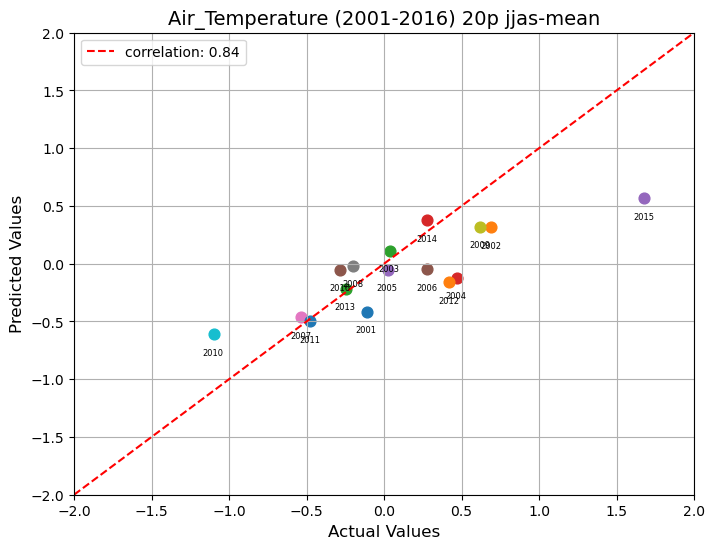

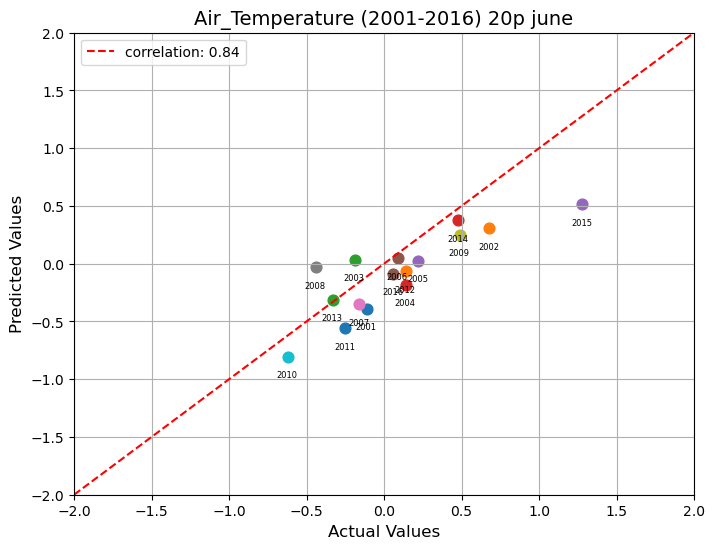

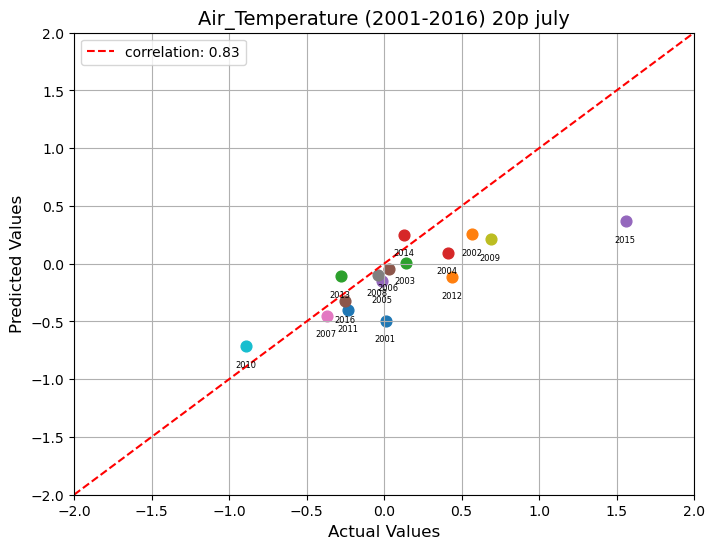

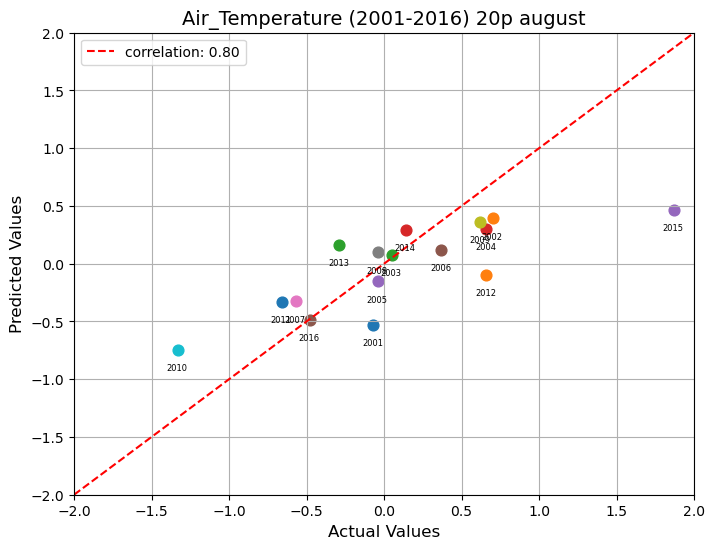

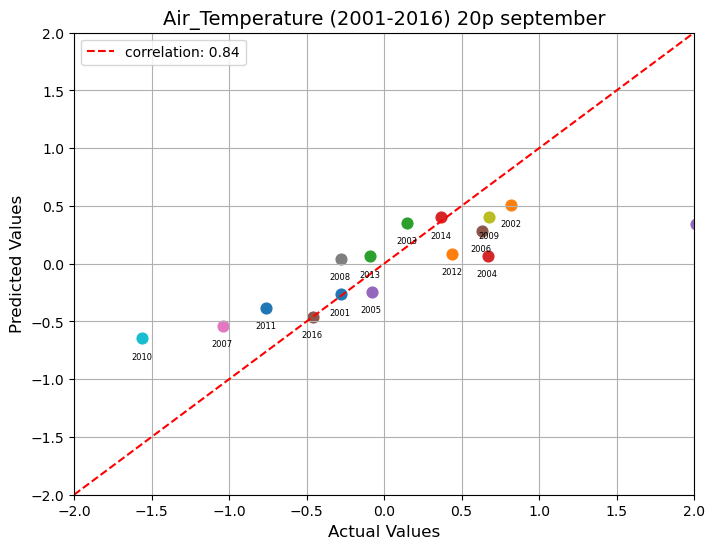

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Air_Temperature (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()